# processing data.py

In [1]:
from PIL import Image as img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import math

# local modules
from process_data import *
# import process_data as pp


In [ ]:
resize_rename_img()

In [ ]:
all_data_y = label_data()

In [ ]:
save_all_data_y(all_data_y)

In [ ]:
check_rectify()

# extract data

In [ ]:
from PIL import Image as img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import math

# local modules
# from process_data import *
from extract_data import *



In [ ]:
all_data_x,all_data_y,m,n = extract()

In [ ]:
print(all_data_x.shape,all_data_y.shape,m,n)

In [ ]:
all_data_x,all_data_y = shuffle_data(all_data_x,all_data_y,m,n)

In [ ]:
print(all_data_x.shape,all_data_y.shape,m,n)

In [ ]:
all_data_y

In [ ]:
train_x,test_x,train_y,test_y = divide_train_test(all_data_x,all_data_y,m,n)

In [ ]:
print(train_x.shape,test_x.shape)
print(train_y.shape,test_y.shape)
    

# running model

In [1]:
from PIL import Image as img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import math

# Local modules
from extract_data import *
from model import *


In [2]:
all_data_x,all_data_y,m,n = extract()
all_data_x,all_data_y = shuffle_data(all_data_x,all_data_y,m,n)
train_x,test_x,train_y,test_y,m_train,m_test = divide_train_test(all_data_x,all_data_y,m,n)

In [3]:
(train_x.shape,test_x.shape,train_y.shape,test_y.shape,m_train,m_test)

((187501, 361), (187501, 155), (1, 361), (1, 155), 361, 155)

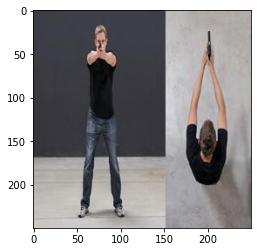

In [4]:
plt.imshow(np.array([int(x) for x in train_x[:-1,0]]).reshape(250,250,3))
plt.show()

(187501, 361) (1, 361) (187501, 1) alpha = 0.00025 itr = 4001
Before GD: 242.4537681228036
After 0 iterations cost : 263.03404936382145
After 500 iterations cost : 124.38389592383841
After 1000 iterations cost : 95.31178177756343
After 1500 iterations cost : 78.58740843952143
After 2000 iterations cost : 67.55301097665286
After 2500 iterations cost : 59.71994684543296
After 3000 iterations cost : 53.87583440419181
After 3500 iterations cost : 49.34965022240738
After 4000 iterations cost : 45.739562567390095


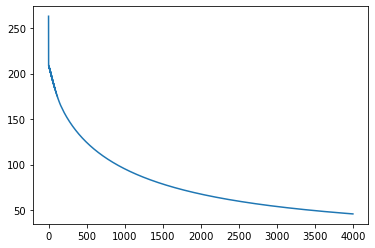

After GD: 45.739562567390095


In [10]:
"""Running Gradient descent"""
theta = np.zeros((n,1))+0.000001
th = theta
# print(theta)
alpha = 0.00025
itr = 4001
x = train_x/255
y = train_y
print(x.shape,y.shape,theta.shape,'alpha =',alpha,'itr =',itr)
print("Before GD:",J(g(theta.transpose() @ x),y))
theta = gd(theta,x,y,alpha,itr,graph=1,cost=1)
print("After GD:",J(g(theta.transpose() @ x),y))
# print(g(theta.transpose() @ x))

In [13]:
print("Train accuracy : ",predict(train_x/255,train_y,theta))
print("Test accuracy : ",predict(test_x/255,test_y,theta))

Train accuracy :  96.95290858725762
Test accuracy :  70.3225806451613


[204.1726398540539, 217.56031314358722, 395.8409314895236, 287.6916777917039, 212.9256727761644, 267.17459521437405, 322.2900546679458, 1265.6096383281208, 779.3152687098013, 519.0753603691608]


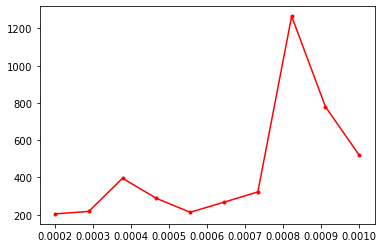

In [15]:
"""Alpha VS Cost"""
# th = np.zeros((n,1))+0.000001
alpha = np.linspace(0.0002,0.001,10)
cost = []
x=train_x/255
y=train_y.copy()
for a in alpha:
    th = np.zeros((n,1))+0.000001
    th = gd(th,x,y,a,10,graph=0)
    # print(theta,end=',')
    cost += [J(g(th.transpose() @ x),y)]
print(cost)
plt.close()
plt.plot(alpha,cost,'r.-')
plt.show()


In [4]:
n = n+1 #"""for bias term 1 added to n"""
m = m_train
th = np.zeros((n,1))+0.000001
# x = np.random.randint(l,r,(n,m))/r
# y = np.random.randint(0,2,(1,m))
y = train_y.copy()
xx = (train_x/255).copy()
print(y.shape,xx.shape)
x = np.vstack((xx,np.ones((1,m))))

(1, 361) (187500, 361)


In [30]:
def predict(x,y,theta):
    predict_y = g(theta.T @ x)
    predict_y[predict_y>=0.5]=1
    predict_y[predict_y<0.5]=0
    # print(predict_y==y)
    return len(predict_y[predict_y==y])*100/y.size


In [12]:
xx=test_x/255
x = np.vstack((xx,np.ones((1,m_test))))

In [14]:
y = test_y

In [32]:
print(predict(test_x/255,test_y,theta))

78.06451612903226
